Linear regression model: Coefficients = [[-0.01365085  1.04143505]]  intercept = [4.30564464]
 y = -0.013650846917261693 * x**2 + 1.041435054216601 * x + [4.30564464]


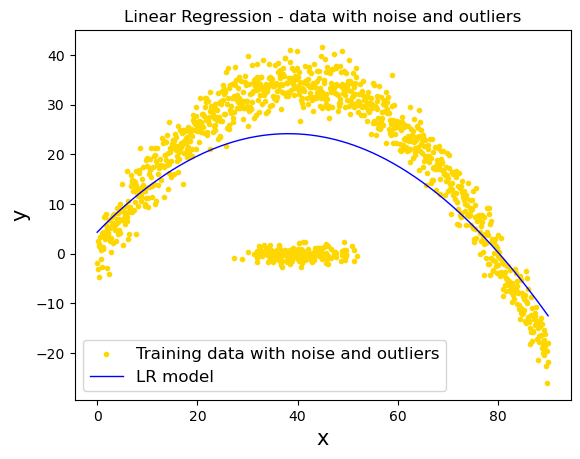

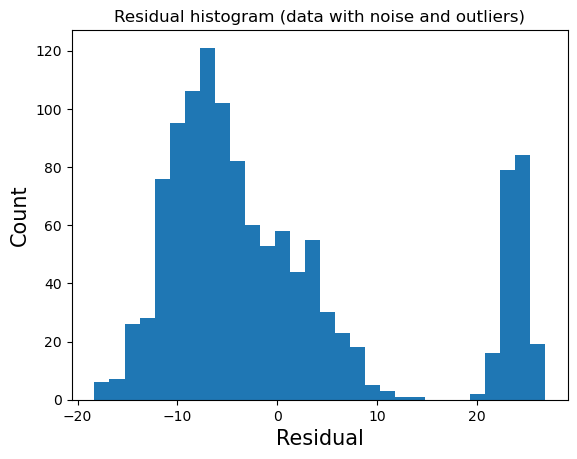

When x = [1600.   40.], y = [24.12169175]


In [137]:
%run LinearRegression_ParabolicTest01.py

In [138]:
from matplotlib import pyplot as plt
import numpy as np
import csv

def ReadCSV(filename):
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        x_mylist = []
        y_mylist = []
        for row in csv_reader:
            x_mylist.append( float(row[0]) )
            y_mylist.append( float(row[1]) )
    return x_mylist, y_mylist

# ******************
_x, _y = ReadCSV('ParabolaWithNoiseOutlier.csv')
number_of_samples = len(_x)
x_pos = np.array(_x)
x_pos = x_pos.reshape(number_of_samples, 1)
y_pos = np.array(_y)
y_pos = y_pos.reshape(number_of_samples, 1)

# *************************** 

t1 = x_pos ** 2
t1 = t1.reshape(number_of_samples, 1)
t2 = x_pos.reshape(number_of_samples, 1)
K = np.concatenate( (t1, t2), axis=1 )

In [139]:
# Feat: RANSAC
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor().fit(K, y_pos)
print( f'RANSAC regression model (with noise and outliers): Coefficients = {ransac.estimator_.coef_}  intercept = {ransac.estimator_.intercept_}' )
# s=ut+(1/2)at^2
print( f's = {ransac.estimator_.intercept_} * t + (1/2) {ransac.estimator_.coef_[0]} * t^2' )

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

RANSAC regression model (with noise and outliers): Coefficients = [[-0.02185117  1.74603543]]  intercept = [-0.47462978]
s = [-0.47462978] * t + (1/2) [-0.02185117  1.74603543] * t^2


Linear regression model: Coefficients = [[-0.02185117  1.74603543]]  intercept = [-0.47462978]
 y = -0.02185116669681091 * x**2 + 1.7460354330065109 * x + [-0.47462978]


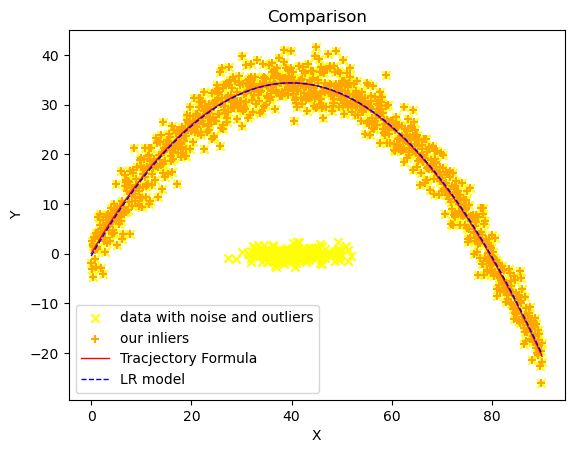

In [140]:
# Extract all the inlier points using the inlier_mask produced by RANSACRegressor
our_inlier_x = x_pos[ inlier_mask ]
our_inlier_y = y_pos[ inlier_mask ]

number_of_samples = len(our_inlier_x)
inlier_t1 = our_inlier_x ** 2
inlier_t1 = inlier_t1.reshape(number_of_samples, 1)
inlier_t2 = our_inlier_x.reshape(number_of_samples, 1)
inlier_K = np.concatenate( (inlier_t1, inlier_t2), axis=1 )

# ******************************
# Use linear regressor to fit a line with our inliers
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(inlier_K, our_inlier_y)

print( f'Linear regression model: Coefficients = {reg.coef_}  intercept = {reg.intercept_}' )
print( f' y = {reg.coef_[0][0]} * x**2 + {reg.coef_[0][1]} * x + {reg.intercept_}' )
# ******************************
#Draw the fitted curve
min_x = min(our_inlier_x)
max_x = max(our_inlier_x)
numOfPoint = 3*len(our_inlier_x)
temp_x = np.linspace(min_x, max_x, num = numOfPoint)
xpoints = temp_x.reshape(numOfPoint, 1)
xxpoints = xpoints ** 2
H = np.concatenate( (xxpoints, xpoints), axis=1)
prediction = reg.predict(H)






plt.scatter(
   x_pos, y_pos, color="yellow", marker="x", label="data with noise and outliers"
)

plt.scatter(
   our_inlier_x, our_inlier_y, color="orange", marker="+", label="our inliers"
)

# plot the true theoretical trajectory mode (y = x * tan(theta) - (g * x^2) / (2 * v0^2 * cos(theta)^2)))
v0 = 30
g = 9.81
theta = 60
plt.plot(xpoints, xpoints * np.tan(np.radians(theta)) - (g * xpoints**2) / (2 * v0**2 * np.cos(np.radians(theta))**2), color="red", linewidth=1, label="Tracjectory Formula")

# def y(x_true, theta_true, g_true, v0_true):
#    return x_true * np.tan(theta_true) - (g_true * x_true**2) / (2 * v0_true**2 * np.cos(theta_true)**2)
# plt.plot(xpoints, y(np.concatenate( (xxpoints, xpoints), axis=1), np.radians(45), 9.81, 10), color="green", linewidth=1, label="True model")

plt.plot(xpoints, prediction, color="blue", linewidth=1, label="LR model", linestyle='dashed')
plt.legend(loc='lower left')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparison')
plt.show()

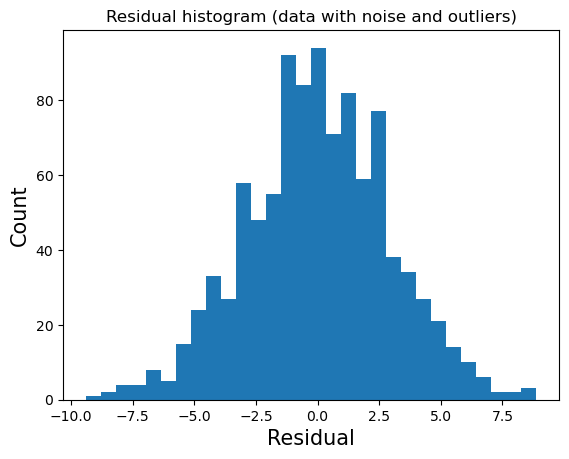

In [141]:
prediction = reg.predict( inlier_K )
residual = prediction - our_inlier_y
plt.hist(residual, bins=30)
plt.xlabel('Residual', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Residual histogram (data with noise and outliers)')
plt.show()

In [142]:
# Predict y value given x value of User Input xxxxxxxxxxxx40.0
x_value = int(input('Enter x value: '))
x_test = np.array([[x_value ** 2, x_value],])
y_result = reg.predict(x_test)

print(f'Prediction: When x = {x_value}, y = {y_result[0][0]}')
print(f'Real value: When x = {x_value}, y = {x_value * np.tan(np.radians(theta)) - (g * x_value**2) / (2 * v0**2 * np.cos(np.radians(theta))**2)}')

Prediction: When x = 40, y = 34.4049208273037
Real value: When x = 40, y = 34.40203230275509


In [143]:
# make predicion and real value into pandas dataframe for comparison
import pandas as pd
min_i = 0
max_i = 86
for i in range(min_i,max_i):
    x_test = np.array([[i ** 2, i],])
    y_result = reg.predict(x_test)
    y_real = i * np.tan(np.radians(theta)) - (g * i**2) / (2 * v0**2 * np.cos(np.radians(theta))**2)
    if i == 0:
        df = pd.DataFrame({'x': [i], 'y_pred': [y_result[0][0]], 'y_real': [y_real]})
    else:
        df = pd.concat([df, pd.DataFrame({'x': [i], 'y_pred': [y_result[0][0]], 'y_real': [y_real]})])
df.set_index('x', inplace=True)
df['y_diff'] = (df['y_pred'] - df['y_real'])
df['y_diff_absolute'] = df['y_diff'].abs()
# display whole dataframe
print(df.to_string())
df.to_csv('comparison.csv')

       y_pred     y_real    y_diff  y_diff_absolute
x                                                  
0   -0.474630   0.000000 -0.474630         0.474630
1    1.249554   1.710251 -0.460696         0.460696
2    2.930036   3.376902 -0.446865         0.446865
3    4.566816   4.999952 -0.433136         0.433136
4    6.159893   6.579403 -0.419510         0.419510
5    7.709268   8.115254 -0.405986         0.405986
6    9.214941   9.607505 -0.392564         0.392564
7   10.676911  11.056156 -0.379245         0.379245
8   12.095179  12.461206 -0.366027         0.366027
9   13.469745  13.822657 -0.352913         0.352913
10  14.800608  15.140508 -0.339900         0.339900
11  16.087769  16.414759 -0.326990         0.326990
12  17.331227  17.645410 -0.314182         0.314182
13  18.530984  18.832460 -0.301477         0.301477
14  19.687038  19.975911 -0.288874         0.288874
15  20.799389  21.075762 -0.276373         0.276373
16  21.868038  22.132013 -0.263974         0.263974
17  22.89298

In [144]:
print(f'Max diff: {df["y_diff_absolute"].max()}')

#display df arrange by diff
print(df.sort_values(by=['y_diff_absolute'], ascending=False).to_string())

Max diff: 0.47462977805928475
       y_pred     y_real    y_diff  y_diff_absolute
x                                                  
0   -0.474630   0.000000 -0.474630         0.474630
1    1.249554   1.710251 -0.460696         0.460696
2    2.930036   3.376902 -0.446865         0.446865
3    4.566816   4.999952 -0.433136         0.433136
4    6.159893   6.579403 -0.419510         0.419510
5    7.709268   8.115254 -0.405986         0.405986
6    9.214941   9.607505 -0.392564         0.392564
7   10.676911  11.056156 -0.379245         0.379245
8   12.095179  12.461206 -0.366027         0.366027
9   13.469745  13.822657 -0.352913         0.352913
85  -9.936297 -10.280681  0.344384         0.344384
10  14.800608  15.140508 -0.339900         0.339900
84  -7.989486  -8.328532  0.339047         0.339047
83  -6.086376  -6.419983  0.333607         0.333607
82  -4.226969  -4.555034  0.328065         0.328065
11  16.087769  16.414759 -0.326990         0.326990
81  -2.411264  -2.733685  0.322420